# Proyecto -EDA y Análisis de Regresión

### Integrantes:
- Juan Yanza
- Miguel Narvaez

## 1) Descripción textual del dataset elegido, objetivos y motivación

### Fuente:
Creado por: Sergio Moro, Paulo Rita y Bernardo Vala (ISCTE-IUL) @ 2016

### Descripción del Dataset:
Los datos están relacionados con publicaciones 'publicadas durante el año de 2014 en la página de Facebook de una reconocida marca de cosméticos.
Este conjunto de datos contiene 500 de las 790 filas y parte de las características analizadas por Moro et al. (2016). El resto se omitió por cuestiones de confidencialidad.

### Descripción de las variables:

- Type: Equivale al tipo de publicación dada en la página.
- Post Month: Es el mes en el que fue realizada la publicación.
- Post Weekday: Día de la semana en el que fue realizada la publicación.
- Post Hour: Hora en el que fue realizada la publicación.
- Paid: Si es una publicación pagada.
- Lifetime Post Total Reach: Tiempo transcurrido desde que se publicó.
- Lifetime Post Total Impressions: El número de impresiones de la publicación de su página.
- Lifetime Engaged Users: Total de interacciones de usuarios en la publicación.
- Lifetime Post Consumptions: Vida útil La cantidad de clics en cualquier lugar de su publicación.
- Lifetime Post Impressions by people who have liked your Page: El número de impresiones de la publicación de su página de unicamente usuarios que les gusta la página.
- Lifetime Post reach by people who like your Page: La cantidad total de personas a las que se envió la publicación de tu página.
- Lifetime People who have liked your Page and engaged with your post: Personas de toda la vida a las que les ha gustado su página y se han comprometido con su publicación.
- Comment: Número de comnentarios que ha recibido la publicación.
- Like: Número de likes que ha recibido la publicación.
- Share: Número de Compartidos que ha recibido la publicación.
- Total Interactions: Total de interacciones que ha recibido la publicación.

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("dataset_Facebook.csv", sep = ';')
data = data.fillna(0)

data['like'] = data['like'].astype('int64')
#veamos cuantas dimensiones y registros contiene
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325,49.0,393


In [3]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.590000,27.048000,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.172528,42.511742,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.000000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


# 2. Análisis Exploratorio de Datos del conjunto de datos (visual, estadístico). Algunas conclusiones.

## ANÁLISIS UNIVARIADO - LIKE

En la presente representación se ha elaborado un resemen de la variable like la cual tiene una media de 178 likes aproximadamente por publicación, pero este valor se puede ver afectado por el valor atípico máximo de 5172 likes, seguidamente se observan más outiliers concentrados en un rango aproximado de 500 a 2000 y en cuanto a los datos más comunes se encuentran distribuidos en un rango de 0 a 186 con casos concretos superiores al cuartil del 75%

count     500.000000
mean      177.590000
std       323.172528
min         0.000000
25%        56.000000
50%       101.000000
75%       187.250000
max      5172.000000
Name: like, dtype: float64


<AxesSubplot:ylabel='like'>

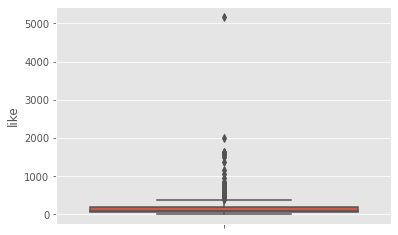

In [4]:
series = data['like']
print(series.describe())
sb.boxplot(y=data["like"])

## ANÁLISIS UNIVARIADO - SHARE

count    500.000000
mean      27.048000
std       42.511742
min        0.000000
25%       10.000000
50%       19.000000
75%       32.000000
max      790.000000
Name: share, dtype: float64


<AxesSubplot:ylabel='share'>

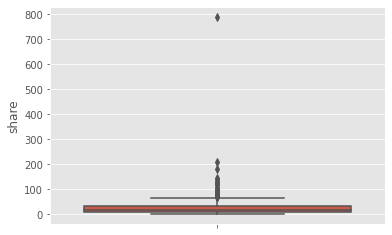

In [5]:
series = data['share']
print(series.describe())
sb.boxplot(y=data["share"])

<AxesSubplot:xlabel='share', ylabel='Density'>

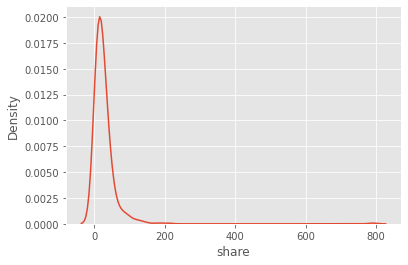

In [6]:
sb.kdeplot(data=data, x="share")

<AxesSubplot:xlabel='Type', ylabel='share'>

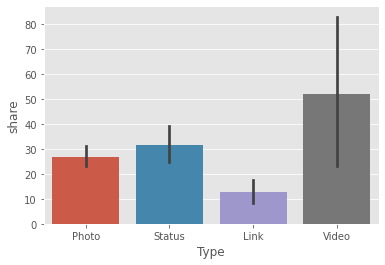

In [7]:
sb.barplot(x="Type", y='share', data=data)

<AxesSubplot:xlabel='Type', ylabel='like'>

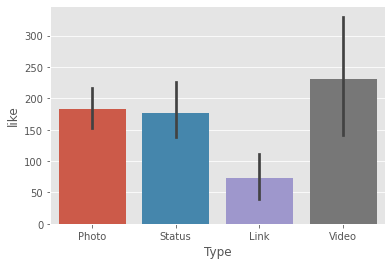

In [8]:
sb.barplot(x="Type", y='like', data=data)

<AxesSubplot:xlabel='Type', ylabel='Count'>

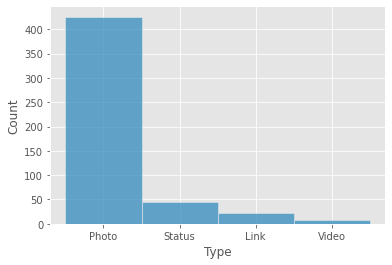

In [9]:
sb.histplot(data=data, x="Type")

<AxesSubplot:>

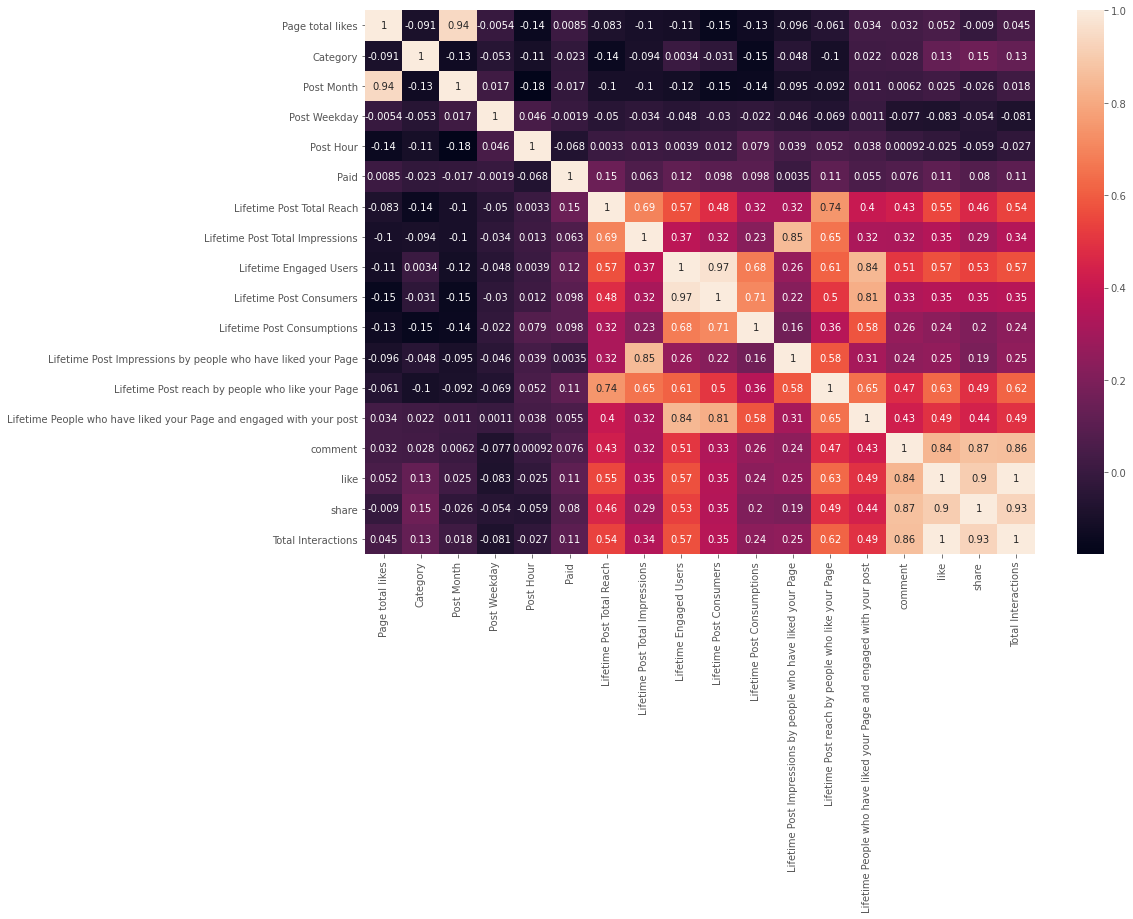

In [10]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)  # dimensión
sb.heatmap(data.corr(), annot=True)  # annot_True para presentar el coeficiente de correlación

## Regresión Lineal entre variables share y likes

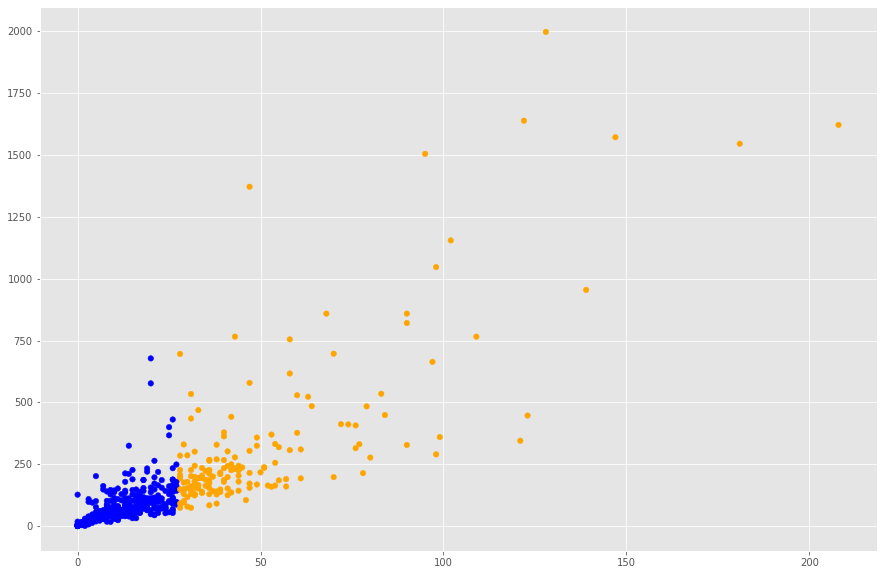

In [11]:

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 550
# y en el eje Y: entre 0 y 4000
filtered_data = data[(data['share'] <= 550) & (data['like'] <= 4000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['share'].values
f2 = filtered_data['like'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Compartidos
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['share']>27):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()


In [12]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["share"]]
X_train = np.array(dataX)
y_train = filtered_data['like'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes:', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino Independiente:', regr.intercept_)
# Error Cuadrado Medio
print("Error Cuadratico Medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('R2: %.2f' % r2_score(y_train, y_pred))

Coeficientes: [7.47433787]
Termino Independiente: -23.156750308712276
Error Cuadratico Medio: 18688.17
R2: 0.66


## Predicción usando OLS

In [13]:
X_train2 = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train2,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     948.5
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.68e-117
Time:                        18:12:40   Log-Likelihood:                -3162.0
No. Observations:                 499   AIC:                             6328.
Df Residuals:                     497   BIC:                             6337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.1568      8.716     -2.657      0.0

In [14]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train2).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,103.906993,6.471220,91.192673,116.621314,-165.523412,373.337399
1,193.599048,6.189966,181.437321,205.760775,-75.805846,463.003942
2,81.483980,6.739252,68.243045,94.724915,-187.971790,350.939749
3,1075.570916,30.113948,1016.404579,1134.737253,800.013763,1351.128069


## Regresión Lineal Múltiple.

In [15]:
# División de los datos en train y test
# ==============================================================================
X = data[['Total Interactions', 'like', 'comment']]
y = data['share']


# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split as tts

# 80% de las observaciones quedan para el conjunto de entrenamiento y 20% para el conjunto de prueba:

x_ent, x_test, y_ent, y_test = tts(X, y, train_size=0.8, random_state=42, shuffle=True)

print(x_ent.shape, x_test.shape)

(400, 3) (100, 3)


In [16]:
# Crear una instancia y entrenar el modelo con los conjuntos de datos de entrenamiento:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_ent, y_ent)

LinearRegression()

In [17]:
# Coeficientes de la función de regresión:
print('a = ' + str(lm.intercept_) , 'y  B = ' + str(lm.coef_) )

a = -1.0658141036401503e-14 y  B = [ 1. -1. -1.]


In [18]:
# Utilizar el modelo para generar las predicciones:

y_predict = lm.predict(x_test)

print(y_predict)

[ 1.80000000e+01  4.70000000e+01  1.60000000e+01  1.60000000e+01
  9.00000000e+00  2.10000000e+01  5.10000000e+01 -1.15463195e-14
  1.70000000e+01  2.10000000e+01  2.60000000e+01  4.20000000e+01
  2.50000000e+01  1.60000000e+01  1.23000000e+02  5.00000000e+00
  2.60000000e+01  2.20000000e+01  1.70000000e+01  7.00000000e+00
  3.00000000e+01  4.60000000e+01  8.00000000e+00  1.60000000e+01
 -1.06581410e-14  1.10000000e+01  1.80000000e+01  2.10000000e+01
  9.50000000e+01  1.00000000e+01  1.90000000e+01  9.00000000e+00
  7.00000000e+00  4.00000000e+01  1.40000000e+01  2.00000000e+01
  2.60000000e+01  9.00000000e+00  2.20000000e+01  2.20000000e+01
  1.30000000e+01  1.60000000e+01  2.00000000e+00  1.00000000e+01
  2.30000000e+01  8.00000000e+00  1.70000000e+01  1.80000000e+01
  1.50000000e+01  2.00000000e+00  4.40000000e+01  4.40000000e+01
  3.00000000e+00  2.40000000e+01  1.70000000e+01  1.40000000e+01
  2.80000000e+01  1.70000000e+01  1.60000000e+01  8.00000000e+00
  4.10000000e+01  1.60000

In [19]:
# Verificar el R^2 (sobre el conjunto de test):

lm.score(x_test, y_test )  # con 1 aprendió muy bien.

1.0

In [20]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 1.6082743933012334e-27
Raíz del Error Cuadrático Medio (RMSE) = 4.0103296539078097e-14


<AxesSubplot:>

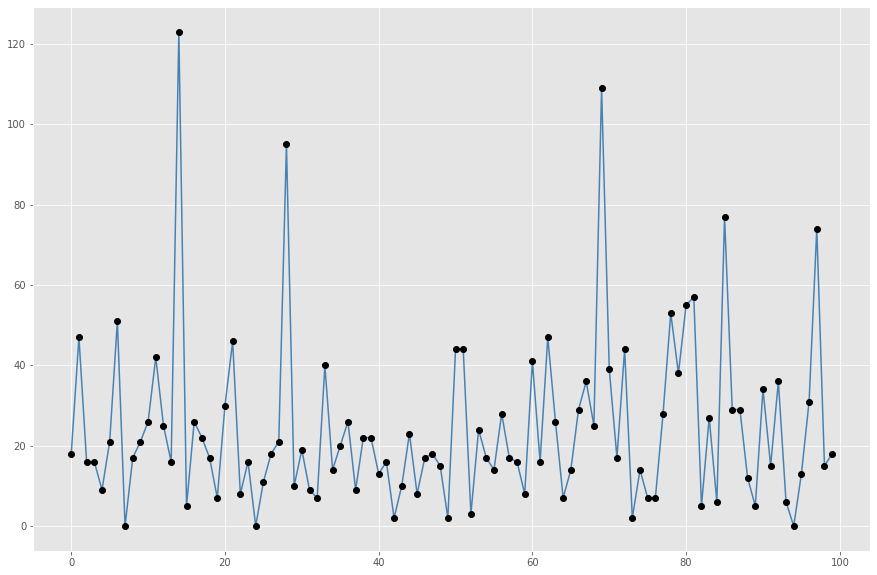

In [21]:
# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')

# Mínimos cuadrados ponderados (WLS)

In [22]:
from scipy import stats
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)


nsample = len(x_ent)
w = np.ones(nsample)
w[nsample * 6//10:] = 3

mod_wls = sm.WLS(y_ent, x_ent, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                
Dep. Variable:                  share   R-squared (uncentered):                   1.000
Model:                            WLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.871e+30
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:12:41   Log-Likelihood:                          10918.
No. Observations:                 400   AIC:                                 -2.183e+04
Df Residuals:                     397   BIC:                                 -2.182e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [23]:
# Evaluación con el set test:
# Utilizar el modelo para generar las predicciones:

y_predictWLS = res_wls.predict(x_test)


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictWLS)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print(40*'*')
print('R2: ', res_wls.rsquared)

Error Cuadrático Medio (MSE) = 1.5509234166307607e-26
Raíz del Error Cuadrático Medio (RMSE) = 1.2453607576243765e-13
****************************************
R2:  1.0


<AxesSubplot:>

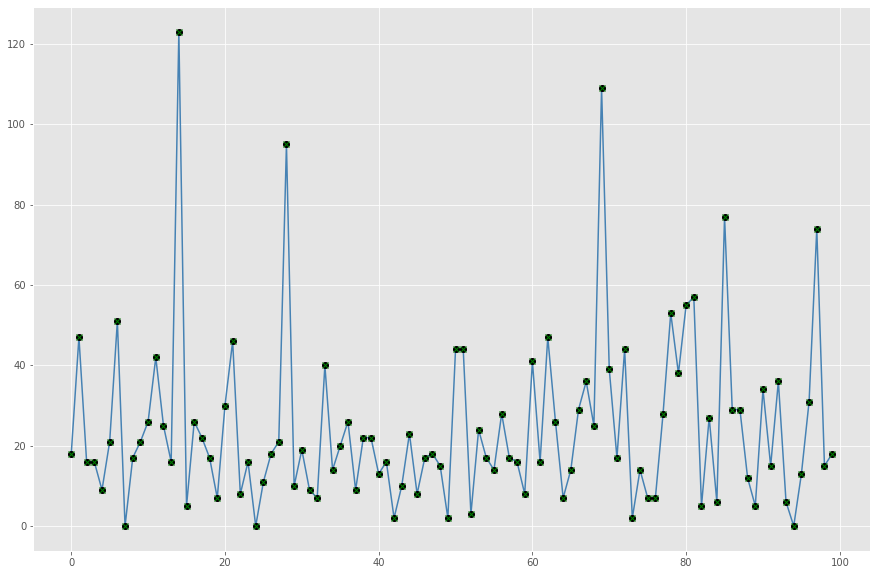

In [25]:
pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')
pd.Series(y_predictWLS.tolist()).plot(marker="x", linewidth=0, color='green')

# Distancia de Mahalanobis Rob(MD)

In [36]:
#Robust Mahalonibis Distance

from sklearn.covariance import MinCovDet


def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md


In [40]:

data_cuantitativos = data.drop(['Type'], axis=1)

# Para todas las variables:

outliers_mahal_rob, md_rb = robust_mahalanobis_method(data_cuantitativos)

outliers_mahal_rob

#Forma recomendada para filtrar los valores atípicos.

2021-07-13 20:48:37,481 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.648226799556625 > 137.235903053758449). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:37,485 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.829934529829956 > 137.565760531464463). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:37,523 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:37,790 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (138.101942965065433 > 137.608081301233682). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:37,834 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.777269717178740 > 136.828007479172868). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:37,853 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:38,122 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.500942197374059 > 136.540089469777485). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:38,149 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.396968715551907 > 137.268129994859208). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:38,153 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:38,374 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.239343163019129 > 135.981968517399309). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:38,384 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.277375800540938 > 137.020100307665302). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:38,392 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:38,695 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.977809128415629 > 134.762801351955233). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:38,704 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.748467386916332 > 137.119069599798223). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:38,728 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:38,976 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (136.433706759396557 > 136.401806670669743). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:38,986 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.620175939227749 > 137.573056027851351). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:39,004 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:39,252 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.452086580045062 > 137.163995602062897). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:39,258 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.583182901341956 > 137.228841954933500). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:39,264 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:39,520 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.958222270983924 > 135.380304055220449). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:39,528 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.854109993713166 > 135.662150423681510). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:39,536 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

2021-07-13 20:48:39,756 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.562697104684702 > 137.432754305602316). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:39,782 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (137.750856167688937 > 137.159586108355086). You may want to try with a higher value of support_fraction (current value: 0.520).
  RuntimeWarning)

2021-07-13 20:48:39,791 [12224] WARNING  py.warnings:110: [JupyterRequire] c:\users\rober\appdata\local\programs\python\

[3,
 10,
 17,
 38,
 42,
 101,
 140,
 142,
 168,
 172,
 183,
 206,
 228,
 242,
 244,
 268,
 275,
 277,
 278,
 279,
 288,
 323,
 346,
 349,
 379,
 380,
 391,
 415,
 427,
 437,
 442,
 446,
 460,
 463,
 464,
 476,
 482,
 492]

In [42]:
len(outliers_mahal_rob)

38